Problem Statement

Businesses or companies can fall prey to default if they are not able to keep up their debt obligations. Defaults will lead to a lower credit rating for the company which in turn reduces its chances of getting credit in the future and may have to pay higher interests on existing debts as well as any new obligations. From an investor's point of view, he would want to invest in a company if it is capable of handling its financial obligations, can grow quickly, and is able to manage the growth scale.

A balance sheet is a financial statement of a company that provides a snapshot of what a company owns, owes, and the amount invested by the shareholders. Thus, it is an important tool that helps evaluate the performance of a business.

Data that is available includes information from the financial statement of the companies for the previous year.

Explanation of data fields available in Data Dictionary, 'Credit Default Data Dictionary.xlsx'
Hints :

Test Train Split -   Split the data into Train and Test dataset in a ratio of 67:33 and use random_state =42. Model Building is to be done on Train Dataset and Model Validation is to be done on Test Dataset.

Credit Risk Dataset
Data Dictionary

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
color = sns.color_palette()
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

Top 5 rows of the data

In [2]:
df = pd.read_excel("CompData-1.xlsx")
df.head()

,Co_Code,Co_Name,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
0,16974,Hind.Cables,8.820000e+09,0.000000e+00,0.462045,0.000352,0.001417,0.322558,0.194472,0.022074,...,0.310901,0.034913,0,0.028801,0.620927,0.026930,0.565744,1,0.015338,0
1,21214,Tata Tele. Mah.,9.380000e+09,4.230000e+09,0.460116,0.000716,0.000000,0.315520,0.161633,0.021902,...,0.314572,0.041653,0,0.006191,0.622513,0.026297,0.560741,1,0.029445,1
2,14852,ABG Shipyard,3.800000e+09,8.150000e+08,0.449893,0.000496,0.000000,0.299851,0.172554,0.022186,...,0.314777,0.033560,0,0.001095,0.623749,0.027276,0.566744,1,0.041718,0
3,2439,GTL,6.440000e+09,0.000000e+00,0.462731,0.000592,0.009313,0.319834,0.174738,0.027638,...,0.316974,0.016527,0,0.003749,0.622963,0.026988,0.565950,1,0.026956,0
4,23505,Bharati Defence,3.680000e+09,0.000000e+00,0.463117,0.000782,0.400243,0.325104,0.176546,0.022072,...,0.317729,0.034497,0,0.006595,0.624419,0.027498,0.567177,1,0.019900,0


Last 5 rows of the data

In [3]:
df.tail()

,Co_Code,Co_Name,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
2053,2743,Kothari Ferment.,3.021580e-04,6.490000e+09,0.477066,0.000000,0.183014,0.322063,0.192739,0.022127,...,0.320387,0.004430,0,0.000420,0.624567,0.026791,0.565158,1,0.171662,0
2054,21216,Firstobj.Tech.,1.371450e-04,0.000000e+00,0.465211,0.000658,0.000000,0.319764,0.169391,0.022072,...,0.312324,0.032284,0,0.000882,0.624008,0.024201,0.573670,1,0.053740,0
2055,142,Diamines & Chem.,2.114990e-04,8.370000e+09,0.480248,0.000502,0.000000,0.327828,0.155005,0.021861,...,0.313122,0.040998,0,0.009579,0.623718,0.026702,0.564697,1,0.054984,0
2056,18014,IL&FS Engg.,3.750000e+09,0.000000e+00,0.474670,0.000578,0.306205,0.322027,0.173834,0.022167,...,0.315632,0.020275,0,0.004958,0.623443,0.026943,0.565792,1,0.057553,0
2057,43229,Channel Nine,2.981110e-04,0.000000e+00,0.467203,0.000826,0.000000,0.330021,0.180236,0.022418,...,0.316734,0.031368,0,0.000186,0.623588,0.026871,0.565512,1,0.020266,0


Shape of the data

In [4]:
df.shape

(2058, 58)

Describe the data

In [5]:
df.describe()

,Co_Code,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,_Operating_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
count,2058.000000,2.058000e+03,2.058000e+03,2058.000000,2.058000e+03,2058.000000,1891.000000,2058.000000,2058.000000,2058.000000,...,2058.000000,2044.000000,2058.000000,2.058000e+03,2058.000000,2058.000000,2058.000000,2058.0,2058.000000,2058.000000
mean,17572.113217,2.052389e+09,1.208634e+09,0.465243,1.113022e+07,0.114777,0.319986,0.176967,0.022761,0.848108,...,0.314629,0.039352,0.003401,2.779397e+07,0.623686,0.027852,0.565435,1.0,0.042529,0.106900
std,21892.886518,3.252624e+09,2.144568e+09,0.022663,9.042595e+07,0.152446,0.015300,0.030157,0.021701,0.004589,...,0.012780,0.047978,0.058236,4.717714e+08,0.011631,0.013839,0.011535,0.0,0.059525,0.309061
min,4.000000,1.000260e-04,0.000000e+00,0.000000,0.000000e+00,0.000000,0.169449,0.000000,0.004282,0.736430,...,0.000000,0.000000,0.000000,0.000000e+00,0.408682,0.012845,0.172065,1.0,0.003946,0.000000
25%,3674.000000,1.578727e-04,0.000000e+00,0.460099,2.760280e-04,0.000000,0.314989,0.166604,0.022058,0.847974,...,0.312783,0.021775,0.000000,9.124052e-04,0.623327,0.026776,0.565158,1.0,0.020408,0.000000
50%,6240.000000,3.330330e-04,1.994130e-04,0.463445,4.540450e-04,0.037099,0.320648,0.175642,0.022100,0.848039,...,0.314642,0.032652,0.000000,2.479550e-03,0.623750,0.026815,0.565315,1.0,0.028460,0.000000
75%,24280.750000,4.110000e+09,1.550000e+09,0.468069,6.630660e-04,0.216191,0.325918,0.185885,0.022152,0.848115,...,0.316546,0.043947,0.000000,7.004449e-03,0.624045,0.027029,0.566232,1.0,0.043433,0.000000
max,72493.000000,9.980000e+09,9.980000e+09,1.000000,9.900000e+08,0.999696,0.462227,0.792348,1.000000,1.000000,...,0.569231,1.000000,1.000000,9.820000e+09,0.956387,0.464388,0.666761,1.0,1.000000,1.000000


Columns names

In [6]:
df.columns

Index(['Co_Code', 'Co_Name', '_Operating_Expense_Rate',
       '_Research_and_development_expense_rate', '_Cash_flow_rate',
       '_Interest_bearing_debt_interest_rate', '_Tax_rate_A',
       '_Cash_Flow_Per_Share', '_Per_Share_Net_profit_before_tax_Yuan_',
       '_Realized_Sales_Gross_Profit_Growth_Rate',
       '_Operating_Profit_Growth_Rate', '_Continuous_Net_Profit_Growth_Rate',
       '_Total_Asset_Growth_Rate', '_Net_Value_Growth_Rate',
       '_Total_Asset_Return_Growth_Rate_Ratio', '_Cash_Reinvestment_perc',
       '_Current_Ratio', '_Quick_Ratio', '_Interest_Expense_Ratio',
       '_Total_debt_to_Total_net_worth', '_Long_term_fund_suitability_ratio_A',
       '_Net_profit_before_tax_to_Paid_in_capital', '_Total_Asset_Turnover',
       '_Accounts_Receivable_Turnover', '_Average_Collection_Days',
       '_Inventory_Turnover_Rate_times', '_Fixed_Assets_Turnover_Frequency',
       '_Net_Worth_Turnover_Rate_times', '_Operating_profit_per_person',
       '_Allocation_rate_per_pers

Renaming the column names

In [7]:
df.columns = df.columns.str.replace('_', '')

Checking for duplicate values

In [8]:
df.duplicated().sum()

0

Datatypes details

In [9]:
df.dtypes

CoCode                                          int64
CoName                                         object
OperatingExpenseRate                          float64
Researchanddevelopmentexpenserate             float64
Cashflowrate                                  float64
Interestbearingdebtinterestrate               float64
TaxrateA                                      float64
CashFlowPerShare                              float64
PerShareNetprofitbeforetaxYuan                float64
RealizedSalesGrossProfitGrowthRate            float64
OperatingProfitGrowthRate                     float64
ContinuousNetProfitGrowthRate                 float64
TotalAssetGrowthRate                          float64
NetValueGrowthRate                            float64
TotalAssetReturnGrowthRateRatio               float64
CashReinvestmentperc                          float64
CurrentRatio                                  float64
QuickRatio                                    float64
InterestExpenseRatio        

Info of the data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 58 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   CoCode                                      2058 non-null   int64  
 1   CoName                                      2058 non-null   object 
 2   OperatingExpenseRate                        2058 non-null   float64
 3   Researchanddevelopmentexpenserate           2058 non-null   float64
 4   Cashflowrate                                2058 non-null   float64
 5   Interestbearingdebtinterestrate             2058 non-null   float64
 6   TaxrateA                                    2058 non-null   float64
 7   CashFlowPerShare                            1891 non-null   float64
 8   PerShareNetprofitbeforetaxYuan              2058 non-null   float64
 9   RealizedSalesGrossProfitGrowthRate          2058 non-null   float64
 10  OperatingPro

1.1 Outlier Treatment

In [11]:
df_num= df.select_dtypes(include=['float64','int64'])

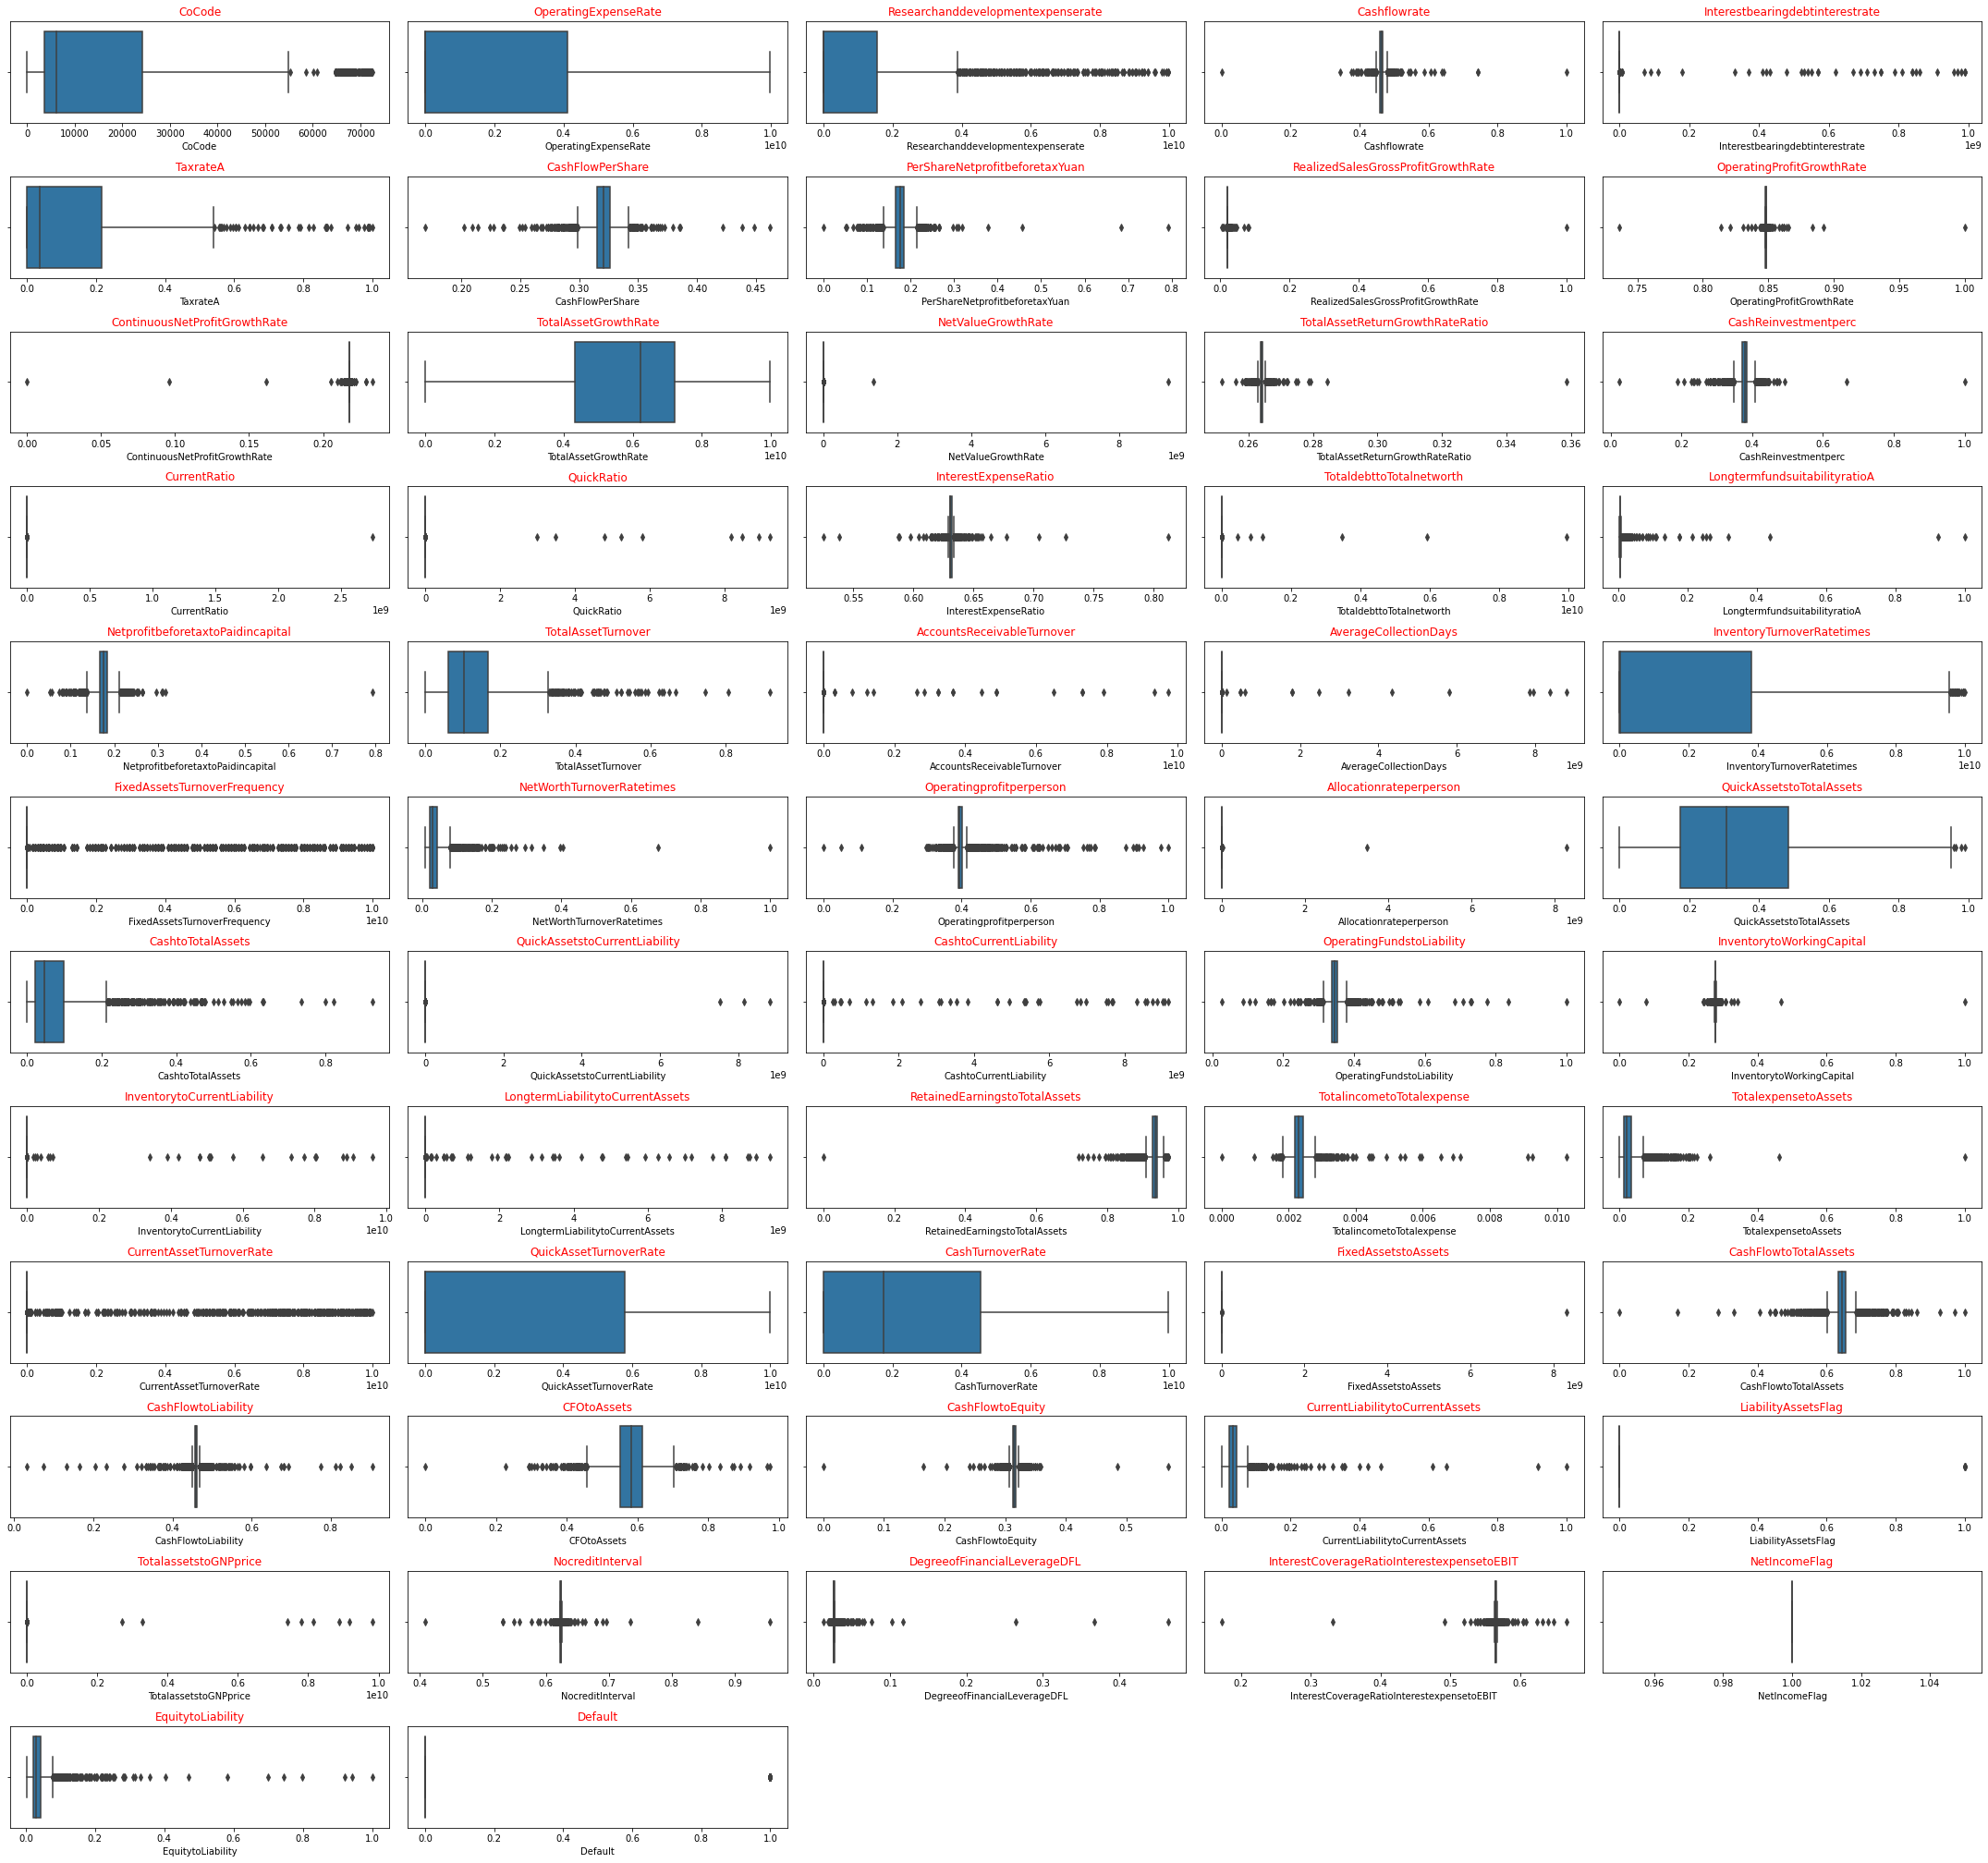

In [12]:
data_plot=df_num
fig=plt.figure(figsize=(30,30))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(13,5,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Red')
plt.tight_layout()

In [13]:
def treat_outlier(x):

    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
   
    IQR=q75-q25
    
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)

    return x.apply(lambda y: q5 if y < lower_bound else y).apply(lambda y: dt if y > upper_bound else y)

In [14]:
def print_outlier(x):
    
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
    min_val = min(x)
    max_val = max(x)
   
    IQR=q75-q25
    
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
 
    return ('5%=',q5,'Q1=',q25,'Q3=',q75,'IQR=',IQR,'LL=',lower_bound,'UL=', upper_bound, '95%', dt, 'max=',max_val, 'min=',min_val)

In [15]:
for i in df_num.columns:    
    df_num[i]=treat_outlier(df_num[i])

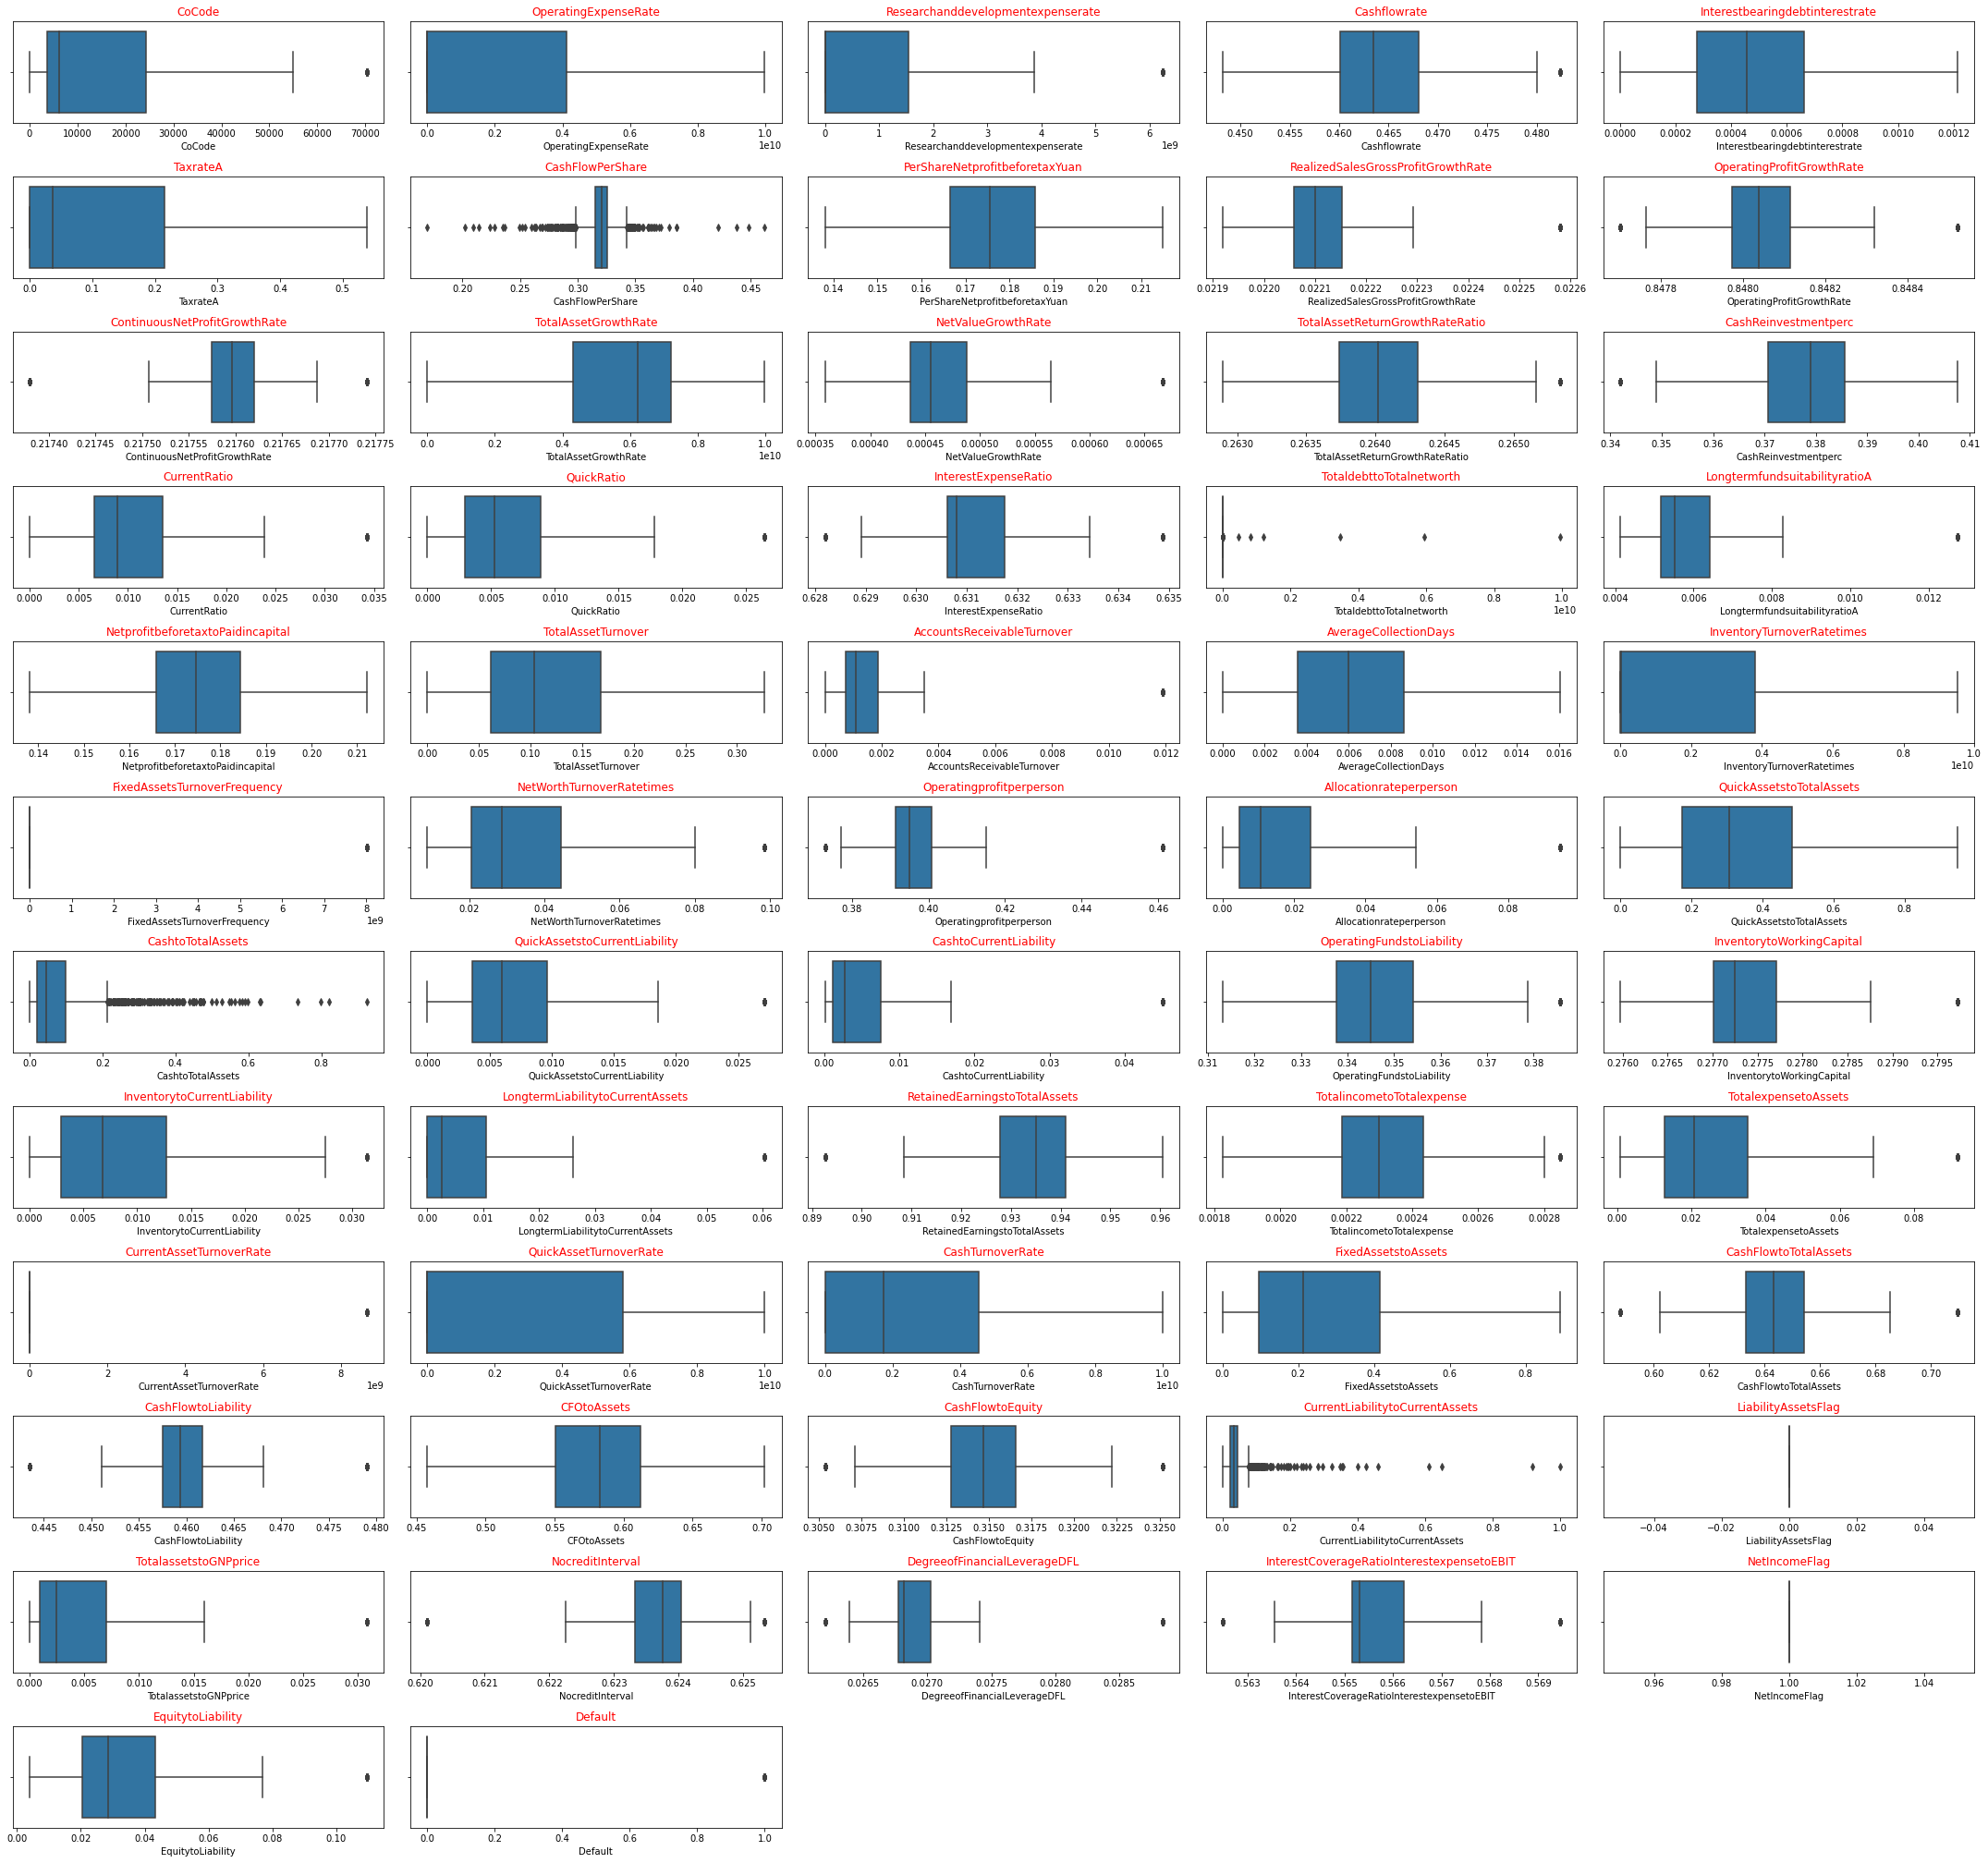

In [16]:
data_plot=df_num
fig=plt.figure(figsize=(30,30))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(13,5,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Red')
plt.tight_layout()

1.2 Missing Value Treatment

In [17]:
df.isnull().sum()

CoCode                                          0
CoName                                          0
OperatingExpenseRate                            0
Researchanddevelopmentexpenserate               0
Cashflowrate                                    0
Interestbearingdebtinterestrate                 0
TaxrateA                                        0
CashFlowPerShare                              167
PerShareNetprofitbeforetaxYuan                  0
RealizedSalesGrossProfitGrowthRate              0
OperatingProfitGrowthRate                       0
ContinuousNetProfitGrowthRate                   0
TotalAssetGrowthRate                            0
NetValueGrowthRate                              0
TotalAssetReturnGrowthRateRatio                 0
CashReinvestmentperc                            0
CurrentRatio                                    0
QuickRatio                                      0
InterestExpenseRatio                            0
TotaldebttoTotalnetworth                       21


Imputing Null values with median

In [18]:
df['CurrentLiabilitytoCurrentAssets'] = df['CurrentLiabilitytoCurrentAssets'].fillna(df['CurrentLiabilitytoCurrentAssets'].median())

In [19]:
df['CashtoTotalAssets'] = df['CashtoTotalAssets'].fillna(df['CashtoTotalAssets'].median())

In [20]:
df['CashFlowPerShare'] = df['CashFlowPerShare'].fillna(df['CashFlowPerShare'].median())

In [21]:
df['TotaldebttoTotalnetworth'] = df['TotaldebttoTotalnetworth'].fillna(df['TotaldebttoTotalnetworth'].median())

In [22]:
df.isnull().sum()

CoCode                                        0
CoName                                        0
OperatingExpenseRate                          0
Researchanddevelopmentexpenserate             0
Cashflowrate                                  0
Interestbearingdebtinterestrate               0
TaxrateA                                      0
CashFlowPerShare                              0
PerShareNetprofitbeforetaxYuan                0
RealizedSalesGrossProfitGrowthRate            0
OperatingProfitGrowthRate                     0
ContinuousNetProfitGrowthRate                 0
TotalAssetGrowthRate                          0
NetValueGrowthRate                            0
TotalAssetReturnGrowthRateRatio               0
CashReinvestmentperc                          0
CurrentRatio                                  0
QuickRatio                                    0
InterestExpenseRatio                          0
TotaldebttoTotalnetworth                      0
LongtermfundsuitabilityratioA           

1.3 Univariate (4 marks) & Bivariate ( 6marks) analysis with proper interpretation. (You may choose to include only those variables which were significant in the model building)

Univariate Analysis

array([[<AxesSubplot:title={'center':'CoCode'}>,
        <AxesSubplot:title={'center':'OperatingExpenseRate'}>,
        <AxesSubplot:title={'center':'Researchanddevelopmentexpenserate'}>,
        <AxesSubplot:title={'center':'Cashflowrate'}>,
        <AxesSubplot:title={'center':'Interestbearingdebtinterestrate'}>,
        <AxesSubplot:title={'center':'TaxrateA'}>,
        <AxesSubplot:title={'center':'CashFlowPerShare'}>,
        <AxesSubplot:title={'center':'PerShareNetprofitbeforetaxYuan'}>],
       [<AxesSubplot:title={'center':'RealizedSalesGrossProfitGrowthRate'}>,
        <AxesSubplot:title={'center':'OperatingProfitGrowthRate'}>,
        <AxesSubplot:title={'center':'ContinuousNetProfitGrowthRate'}>,
        <AxesSubplot:title={'center':'TotalAssetGrowthRate'}>,
        <AxesSubplot:title={'center':'NetValueGrowthRate'}>,
        <AxesSubplot:title={'center':'TotalAssetReturnGrowthRateRatio'}>,
        <AxesSubplot:title={'center':'CashReinvestmentperc'}>,
        <AxesSubplot:

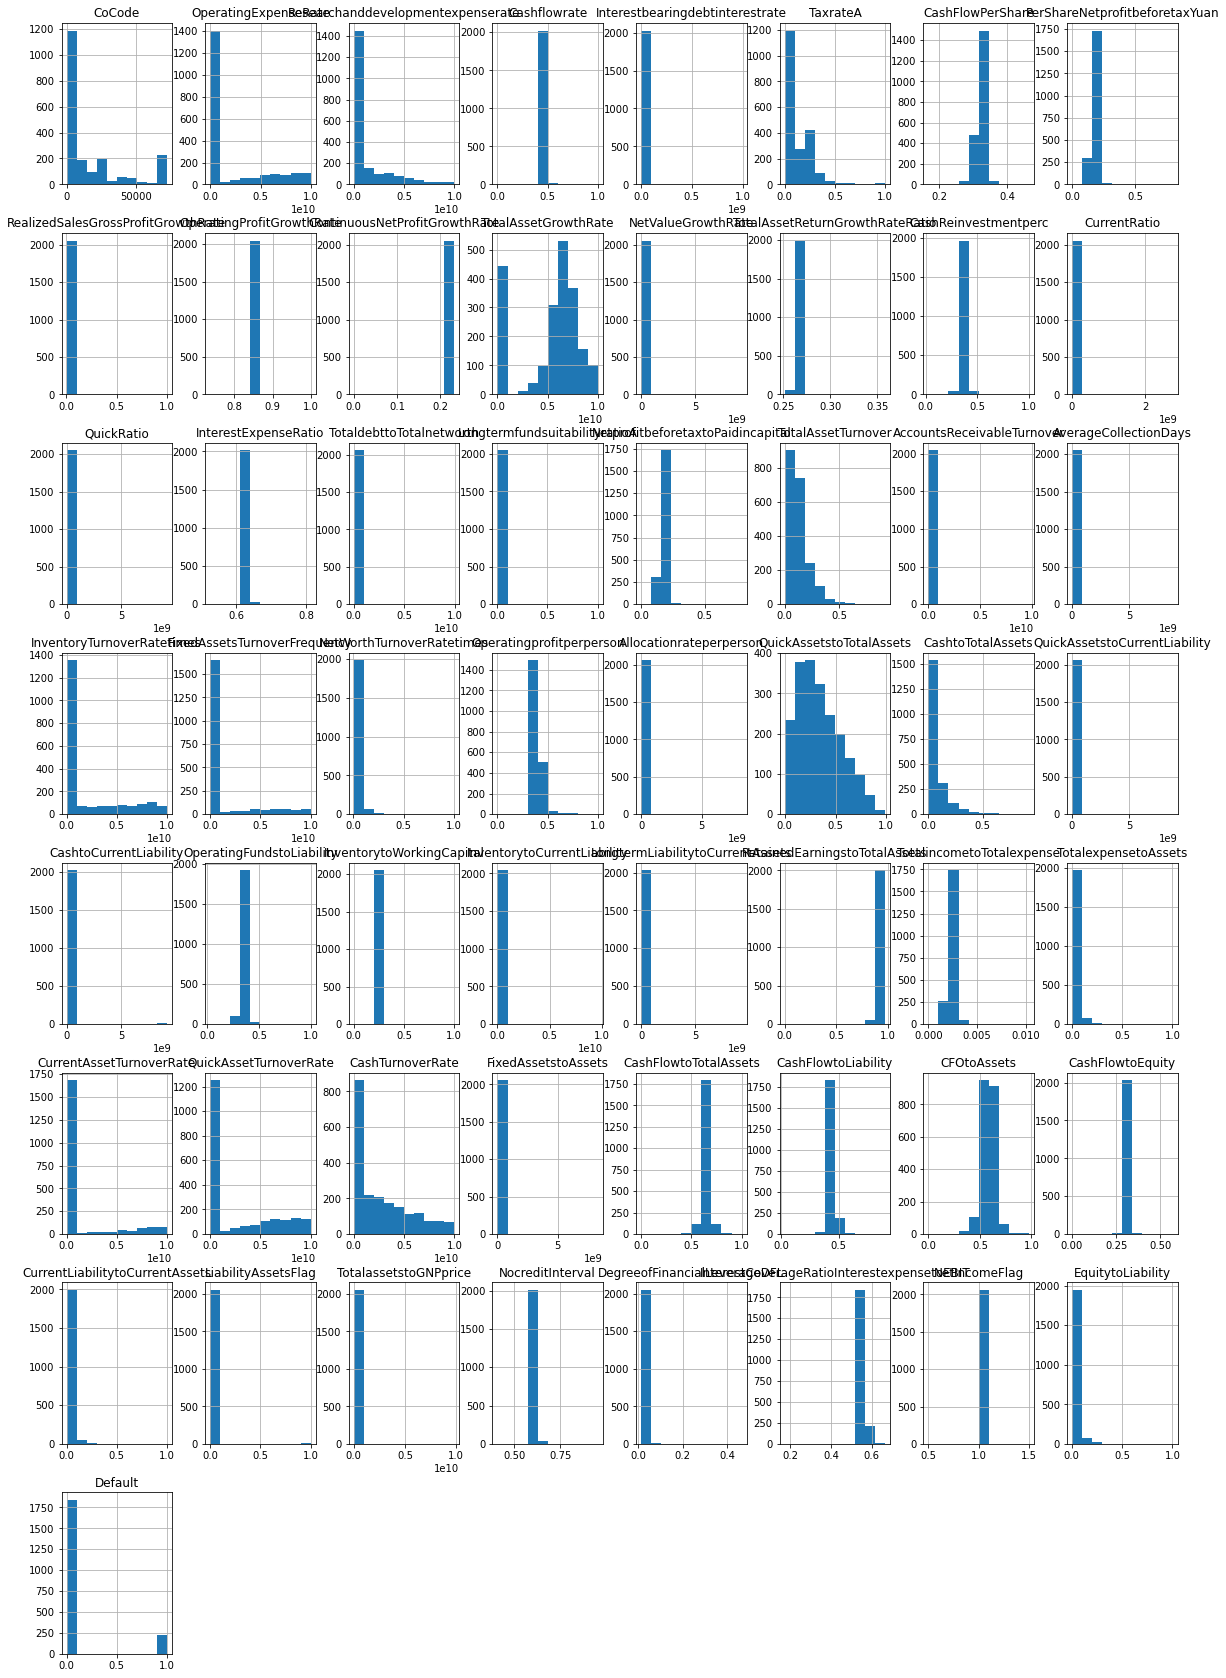

In [23]:
df.hist(figsize=(20,30))

In [24]:
df.columns

Index(['CoCode', 'CoName', 'OperatingExpenseRate',
       'Researchanddevelopmentexpenserate', 'Cashflowrate',
       'Interestbearingdebtinterestrate', 'TaxrateA', 'CashFlowPerShare',
       'PerShareNetprofitbeforetaxYuan', 'RealizedSalesGrossProfitGrowthRate',
       'OperatingProfitGrowthRate', 'ContinuousNetProfitGrowthRate',
       'TotalAssetGrowthRate', 'NetValueGrowthRate',
       'TotalAssetReturnGrowthRateRatio', 'CashReinvestmentperc',
       'CurrentRatio', 'QuickRatio', 'InterestExpenseRatio',
       'TotaldebttoTotalnetworth', 'LongtermfundsuitabilityratioA',
       'NetprofitbeforetaxtoPaidincapital', 'TotalAssetTurnover',
       'AccountsReceivableTurnover', 'AverageCollectionDays',
       'InventoryTurnoverRatetimes', 'FixedAssetsTurnoverFrequency',
       'NetWorthTurnoverRatetimes', 'Operatingprofitperperson',
       'Allocationrateperperson', 'QuickAssetstoTotalAssets',
       'CashtoTotalAssets', 'QuickAssetstoCurrentLiability',
       'CashtoCurrentLiability', 'O

Bivariate Analysis

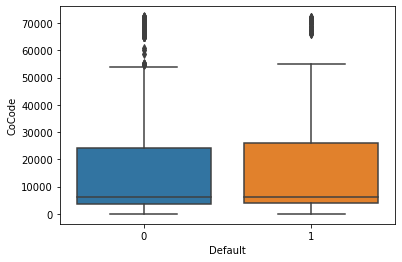

In [25]:
sns.boxplot(x="Default", y = "CoCode", data=df);

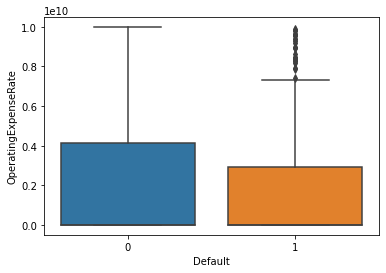

In [26]:
sns.boxplot(x="Default", y = "OperatingExpenseRate", data=df);

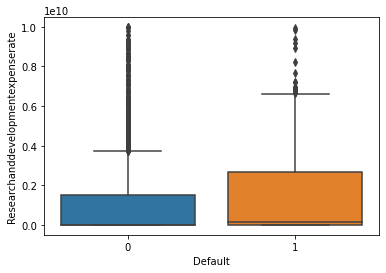

In [27]:
sns.boxplot(x="Default", y = "Researchanddevelopmentexpenserate", data=df);

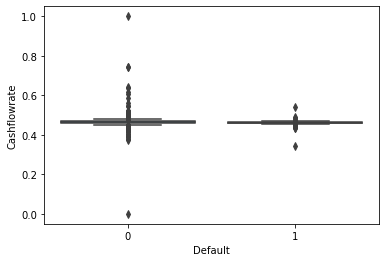

In [28]:
sns.boxplot(x="Default", y = "Cashflowrate", data=df);

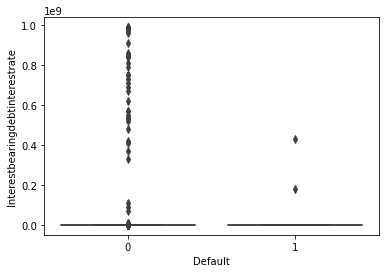

In [29]:
sns.boxplot(x="Default", y = "Interestbearingdebtinterestrate", data=df);

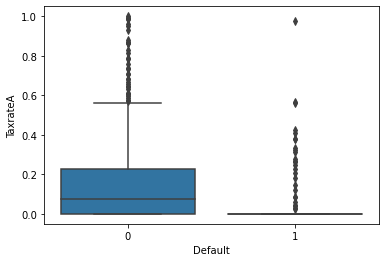

In [30]:
sns.boxplot(x="Default", y = "TaxrateA", data=df);

Bivariate Analysis

<AxesSubplot:xlabel='OperatingExpenseRate'>

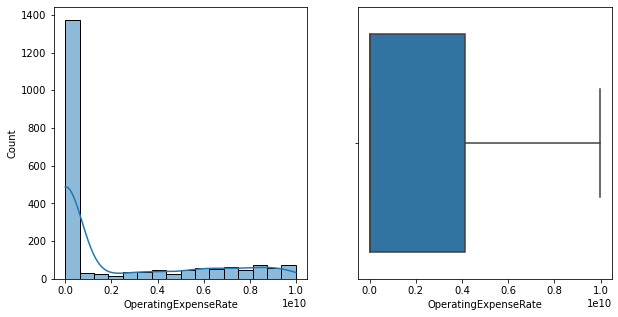

In [31]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(df.OperatingExpenseRate, kde=True, ax=axs[0])
sns.boxplot(x='OperatingExpenseRate',data=df, ax=axs[1])

<AxesSubplot:xlabel='Researchanddevelopmentexpenserate'>

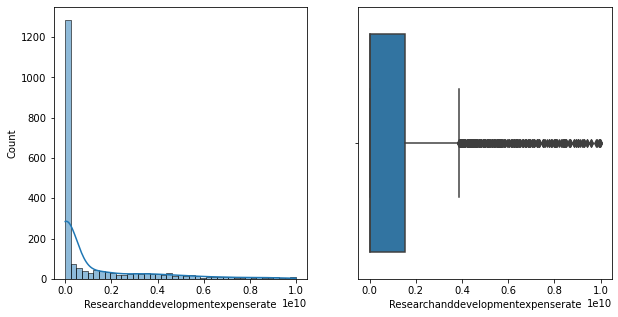

In [32]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(df.Researchanddevelopmentexpenserate, kde=True, ax=axs[0])
sns.boxplot(x='Researchanddevelopmentexpenserate',data=df, ax=axs[1])

<AxesSubplot:xlabel='Cashflowrate'>

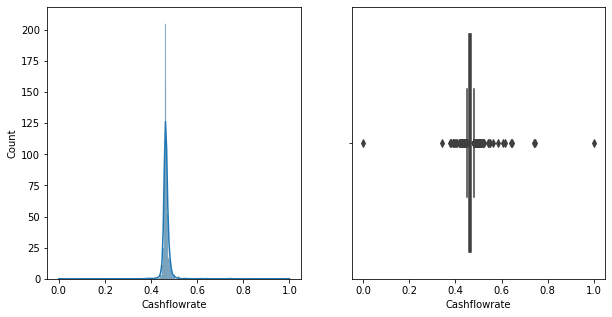

In [33]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(df.Cashflowrate, kde=True, ax=axs[0])
sns.boxplot(x='Cashflowrate',data=df, ax=axs[1])

<AxesSubplot:xlabel='TaxrateA'>

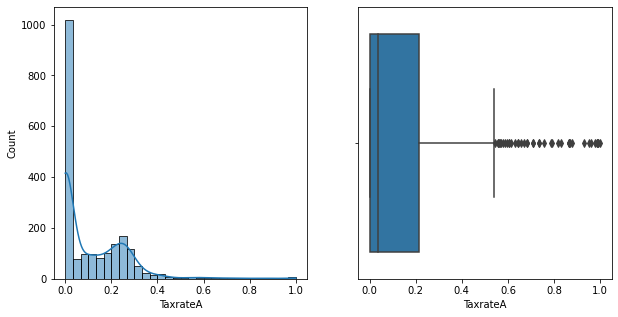

In [34]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(df.TaxrateA, kde=True, ax=axs[0])
sns.boxplot(x='TaxrateA',data=df, ax=axs[1])

<AxesSubplot:xlabel='CashFlowPerShare'>

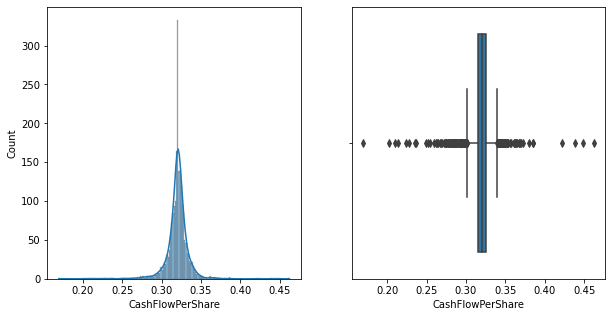

In [35]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(df.CashFlowPerShare, kde=True, ax=axs[0])
sns.boxplot(x='CashFlowPerShare',data=df, ax=axs[1])

<AxesSubplot:xlabel='PerShareNetprofitbeforetaxYuan'>

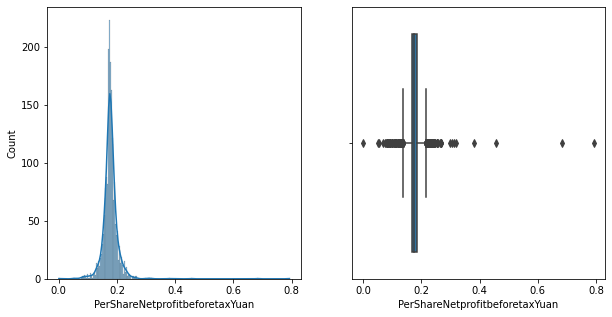

In [36]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(df.PerShareNetprofitbeforetaxYuan, kde=True, ax=axs[0])
sns.boxplot(x='PerShareNetprofitbeforetaxYuan',data=df, ax=axs[1])

In [37]:
df.columns

Index(['CoCode', 'CoName', 'OperatingExpenseRate',
       'Researchanddevelopmentexpenserate', 'Cashflowrate',
       'Interestbearingdebtinterestrate', 'TaxrateA', 'CashFlowPerShare',
       'PerShareNetprofitbeforetaxYuan', 'RealizedSalesGrossProfitGrowthRate',
       'OperatingProfitGrowthRate', 'ContinuousNetProfitGrowthRate',
       'TotalAssetGrowthRate', 'NetValueGrowthRate',
       'TotalAssetReturnGrowthRateRatio', 'CashReinvestmentperc',
       'CurrentRatio', 'QuickRatio', 'InterestExpenseRatio',
       'TotaldebttoTotalnetworth', 'LongtermfundsuitabilityratioA',
       'NetprofitbeforetaxtoPaidincapital', 'TotalAssetTurnover',
       'AccountsReceivableTurnover', 'AverageCollectionDays',
       'InventoryTurnoverRatetimes', 'FixedAssetsTurnoverFrequency',
       'NetWorthTurnoverRatetimes', 'Operatingprofitperperson',
       'Allocationrateperperson', 'QuickAssetstoTotalAssets',
       'CashtoTotalAssets', 'QuickAssetstoCurrentLiability',
       'CashtoCurrentLiability', 'O

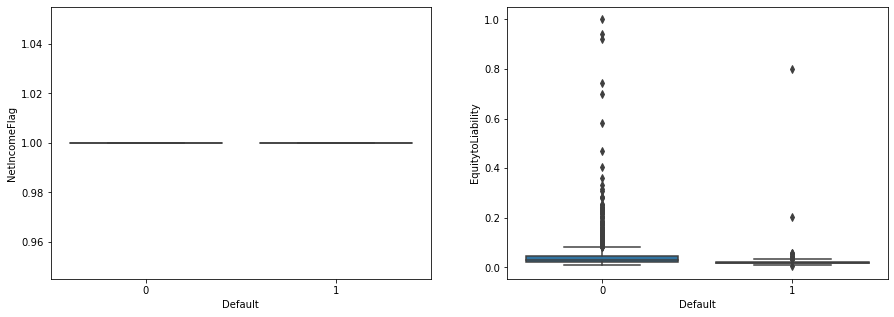

In [38]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(df['Default'], df['NetIncomeFlag'])

plt.subplot(1,2,2)
sns.boxplot(df['Default'], df['EquitytoLiability'])
plt.show()

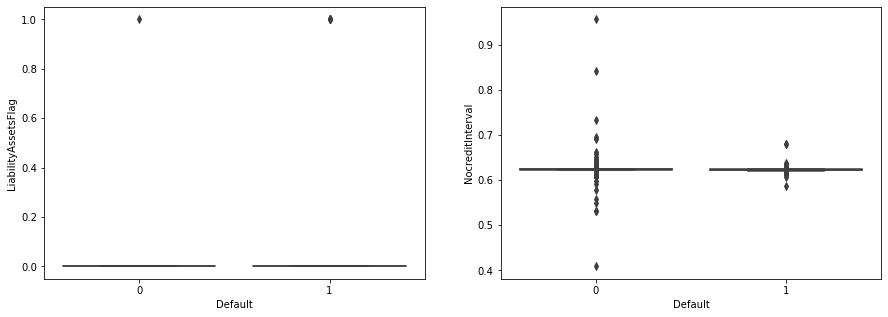

In [39]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(df['Default'], df['LiabilityAssetsFlag'])

plt.subplot(1,2,2)
sns.boxplot(df['Default'], df['NocreditInterval'])
plt.show()

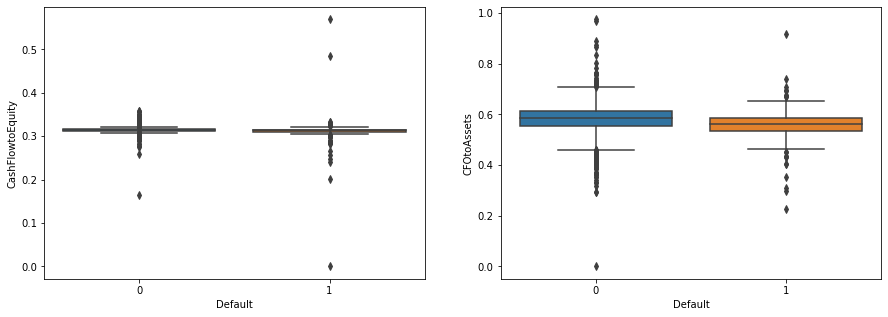

In [40]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(df['Default'], df['CashFlowtoEquity'])

plt.subplot(1,2,2)
sns.boxplot(df['Default'], df['CFOtoAssets'])
plt.show()

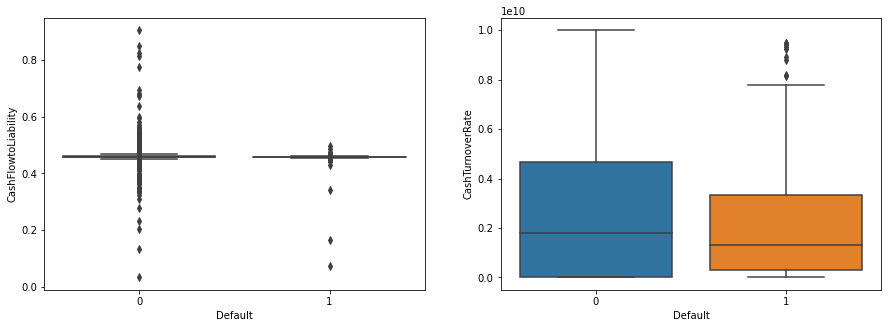

In [41]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(df['Default'], df['CashFlowtoLiability'])

plt.subplot(1,2,2)
sns.boxplot(df['Default'], df['CashTurnoverRate'])
plt.show()

Bivariate Analysis

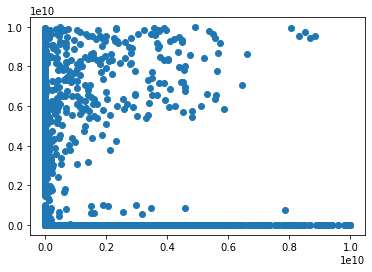

In [42]:
plt.scatter(df['Researchanddevelopmentexpenserate'],df['OperatingExpenseRate'])

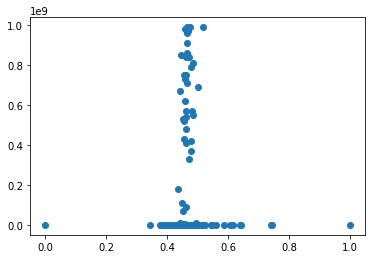

In [43]:
plt.scatter(df['Cashflowrate'],df['Interestbearingdebtinterestrate'])

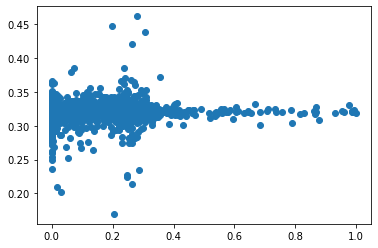

In [44]:
plt.scatter(df['TaxrateA'],df['CashFlowPerShare'])

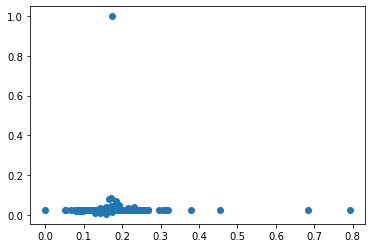

In [45]:
plt.scatter(df['PerShareNetprofitbeforetaxYuan'],df['RealizedSalesGrossProfitGrowthRate'])

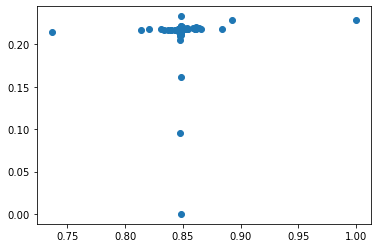

In [46]:
plt.scatter(df['OperatingProfitGrowthRate'],df['ContinuousNetProfitGrowthRate'])

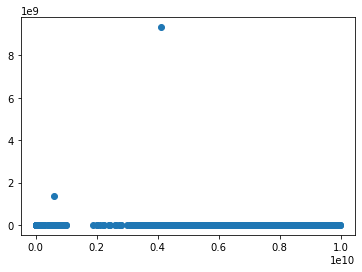

In [47]:
plt.scatter(df['TotalAssetGrowthRate'],df['NetValueGrowthRate'])

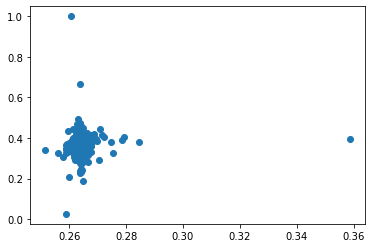

In [48]:
plt.scatter(df['TotalAssetReturnGrowthRateRatio'],df['CashReinvestmentperc'])

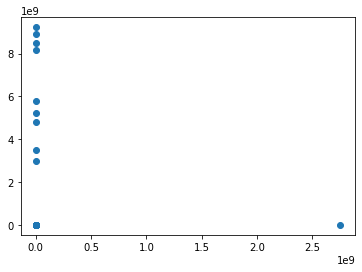

In [49]:
plt.scatter(df['CurrentRatio'],df['QuickRatio'])

Correlation

In [50]:
corr = df.corr()
corr

,CoCode,OperatingExpenseRate,Researchanddevelopmentexpenserate,Cashflowrate,Interestbearingdebtinterestrate,TaxrateA,CashFlowPerShare,PerShareNetprofitbeforetaxYuan,RealizedSalesGrossProfitGrowthRate,OperatingProfitGrowthRate,...,CashFlowtoEquity,CurrentLiabilitytoCurrentAssets,LiabilityAssetsFlag,TotalassetstoGNPprice,NocreditInterval,DegreeofFinancialLeverageDFL,InterestCoverageRatioInterestexpensetoEBIT,NetIncomeFlag,EquitytoLiability,Default
CoCode,1.000000,-0.000762,0.001389,0.026369,-0.004007,0.008944,-0.014242,0.012336,-0.018051,0.009023,...,-0.029759,0.015275,-0.038772,-0.020553,0.027197,-0.009654,0.002899,NaN,-0.005232,0.022952
OperatingExpenseRate,-0.000762,1.000000,-0.056053,-0.005952,-0.011800,0.045098,-0.029786,0.071273,-0.015138,0.040289,...,0.024649,-0.035987,-0.003893,-0.036773,0.000014,0.003302,-0.032517,NaN,-0.105709,-0.017544
Researchanddevelopmentexpenserate,0.001389,-0.056053,1.000000,0.012006,0.004101,-0.042044,0.037201,-0.034641,-0.006365,0.016900,...,0.028588,-0.079428,0.004292,0.009084,-0.020097,0.009770,-0.056302,NaN,-0.002040,0.064059
Cashflowrate,0.026369,-0.005952,0.012006,1.000000,0.015416,0.057575,0.273687,0.102304,-0.012234,-0.005802,...,0.080332,-0.045854,-0.011922,-0.022361,0.041804,-0.004239,-0.000932,NaN,0.329836,-0.069656
Interestbearingdebtinterestrate,-0.004007,-0.011800,0.004101,0.015416,1.000000,0.024528,0.015775,0.030109,-0.003742,-0.002188,...,-0.011035,0.064814,0.083278,-0.007255,-0.020884,-0.009217,-0.002019,NaN,0.051846,-0.031984
TaxrateA,0.008944,0.045098,-0.042044,0.057575,0.024528,1.000000,0.104955,0.256484,0.010968,0.041409,...,0.055528,-0.052896,-0.043996,-0.037508,0.100098,-0.005767,0.051086,NaN,-0.025631,-0.188608
CashFlowPerShare,-0.014242,-0.029786,0.037201,0.273687,0.015775,0.104955,1.000000,0.307426,-0.222966,-0.057979,...,0.107815,0.015231,-0.006815,0.005216,0.025101,0.002421,0.003407,NaN,0.050646,-0.078630
PerShareNetprofitbeforetaxYuan,0.012336,0.071273,-0.034641,0.102304,0.030109,0.256484,0.307426,1.000000,0.001068,0.101983,...,0.109888,-0.106350,-0.199235,-0.036341,0.013218,-0.012304,0.021377,NaN,0.020859,-0.335090
RealizedSalesGrossProfitGrowthRate,-0.018051,-0.015138,-0.006365,-0.012234,-0.003742,0.010968,-0.222966,0.001068,1.000000,0.005356,...,-0.012212,-0.005494,-0.002822,0.000770,-0.000260,-0.001949,-0.000894,NaN,-0.005243,-0.006118
OperatingProfitGrowthRate,0.009023,0.040289,0.016900,-0.005802,-0.002188,0.041409,-0.057979,0.101983,0.005356,1.000000,...,-0.130006,-0.077678,-0.212507,-0.002386,-0.002040,0.002825,0.005596,NaN,-0.008420,-0.077024


Heatmap

<AxesSubplot:>

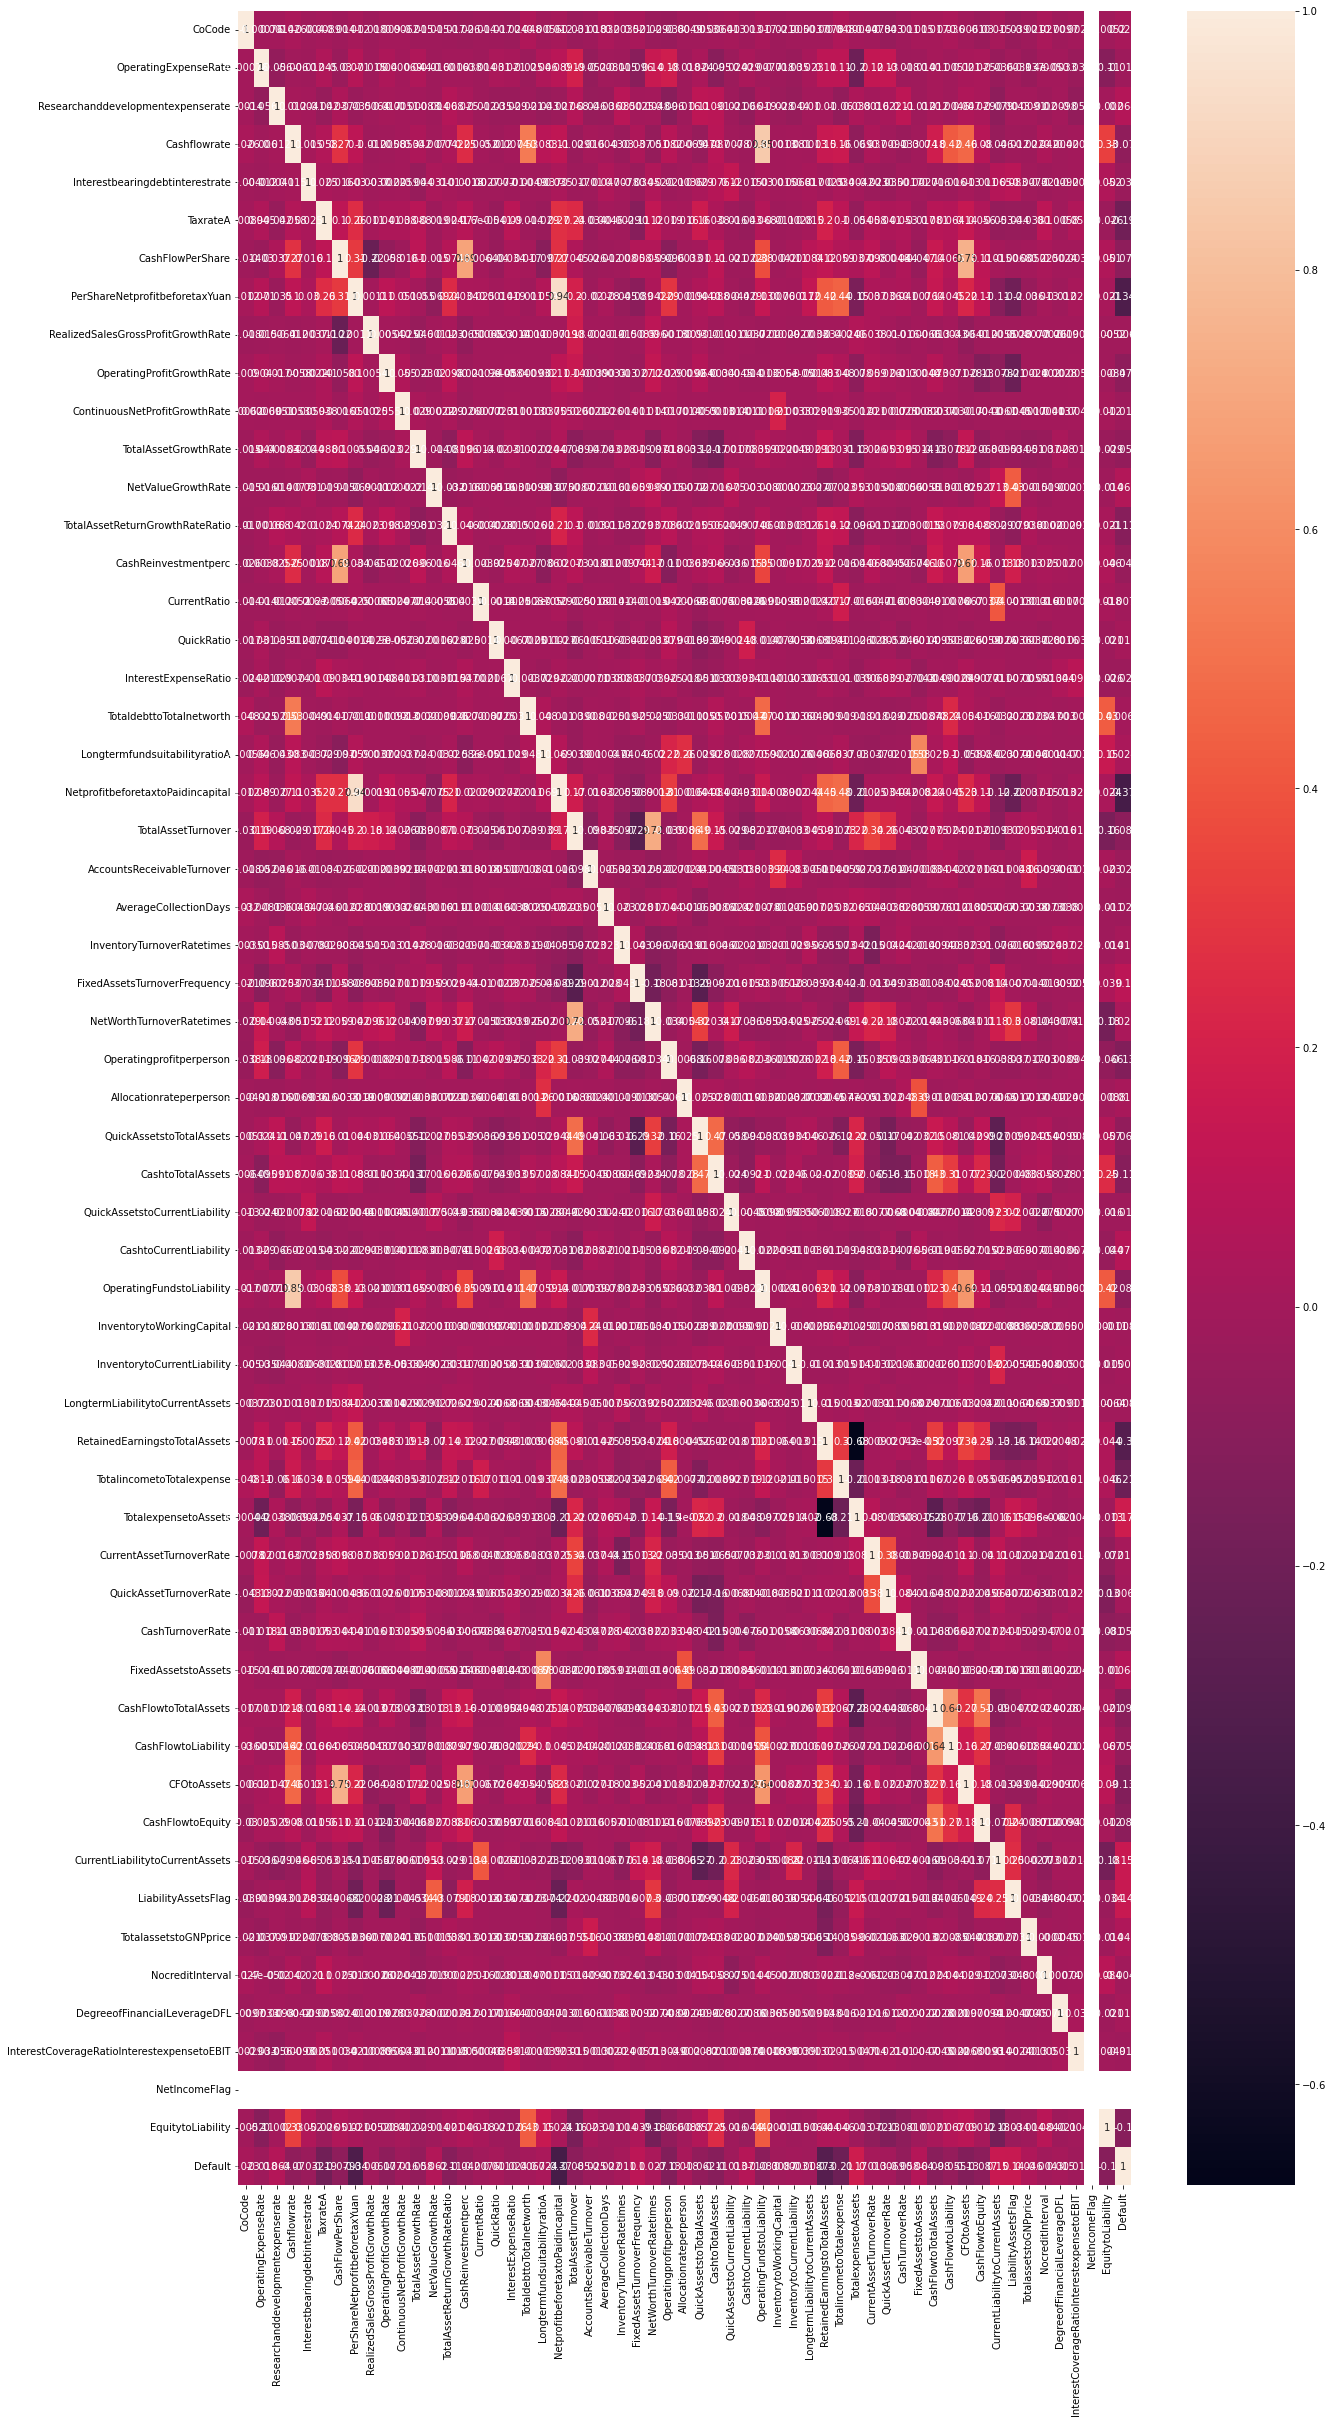

In [51]:
plt.figure(figsize=(20,40))
sns.heatmap(corr, annot=True)

Multivariate Analysis

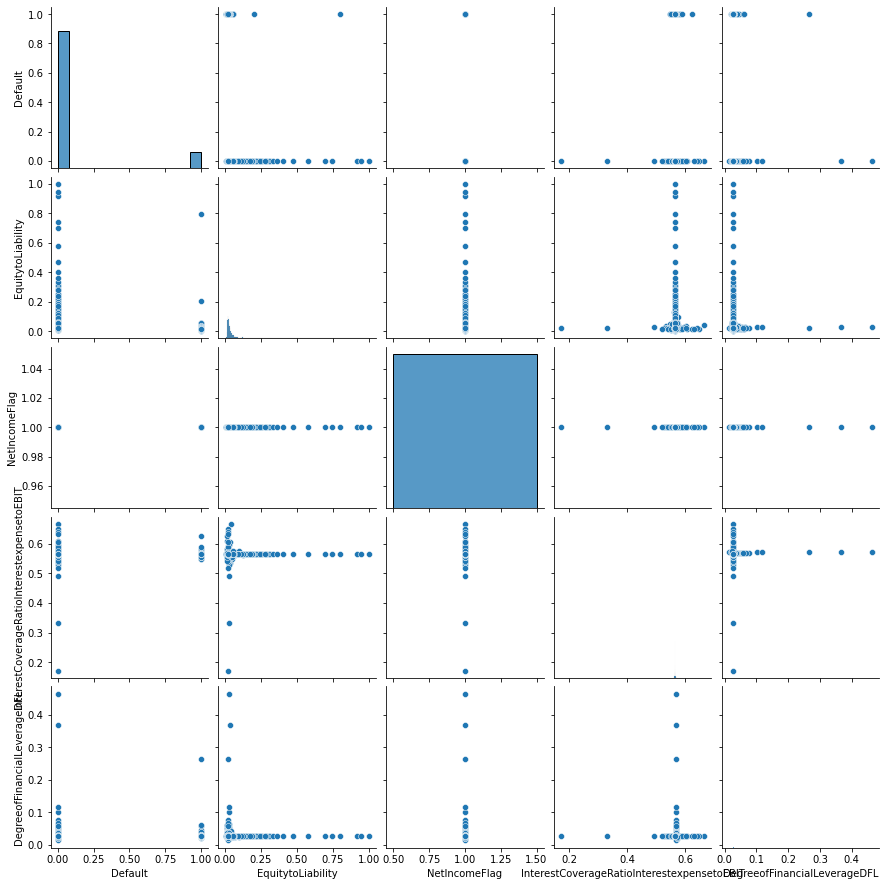

In [52]:
from IPython.display import Image
col= ['Default', 'EquitytoLiability','NetIncomeFlag','InterestCoverageRatioInterestexpensetoEBIT', 'DegreeofFinancialLeverageDFL']

sns_plot = sns.pairplot(df[col])

1.4 Train Test Split

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X = df.drop('Default', axis = 1)
y = df['Default']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42, stratify = y)

In [56]:
print(X_train.shape)
print(X_test.shape)

(1378, 57)
(680, 57)


1.5 Build Logistic Regression Model (using statsmodel library) on most important variables on Train Dataset and choose the optimum cutoff. Also showcase your model building approach

In [57]:
import statsmodels.formula.api as SM

In [58]:
f_1 = 'Default ~ EquitytoLiability + NetIncomeFlag + TaxrateA + NetValueGrowthRate + CFOtoAssets'

In [59]:
model_1 = SM.logit(formula = f_1, data=df).fit()

Optimization terminated successfully.
         Current function value: 0.290184
         Iterations 9


In [60]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2058
Model:                          Logit   Df Residuals:                     2053
Method:                           MLE   Df Model:                            4
Date:                Sun, 21 May 2023   Pseudo R-squ.:                  0.1465
Time:                        18:02:49   Log-Likelihood:                -597.20
converged:                       True   LL-Null:                       -699.69
Covariance Type:            nonrobust   LLR p-value:                 3.195e-43
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.5937        nan        nan        nan         nan         nan
EquitytoLiability    -38.0689      6.543     -5.818      0.000     -50.893     -25.245
NetIncomeFlag          0.5937        nan        nan        nan         nan         nan
TaxrateA              -7.6434        nan        nan        nan         nan         nan
NetValueGrowthRate  3.523e-10   4.18e-10      0.842      0.400   -4.68e-10    1.17e-09
CFOtoAssets           -2.8897        nan        nan        nan         nan         nan
======================================================================================
"""

In [61]:
X = df.drop(['Default'], axis=1)
y = df['Default']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42,stratify=df['Default'])
Default_train = pd.concat([X_train,y_train], axis=1)
Default_test = pd.concat([X_test,y_test], axis=1)

In [62]:
y_prob_pred_train = model_1.predict(Default_train)
y_prob_pred_train

2011    0.083433
697     0.015214
160     0.219044
1273    0.211316
541     0.192991
          ...   
1386    0.018763
1127    0.047031
950     0.051912
1058    0.014212
562     0.275059
Length: 1378, dtype: float64

In [63]:
y_prob_pred_test = model_1.predict(Default_test)
y_prob_pred_test

974     0.019277
134     0.244656
1267    0.011572
464     0.003408
579     0.019610
          ...   
1792    0.224035
443     0.124064
621     0.002900
518     0.171539
2057    0.182383
Length: 680, dtype: float64

In [64]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [65]:
y_prob_pred_train = model_1.predict(Default_test)

In [66]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.2:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [67]:
from sklearn import metrics

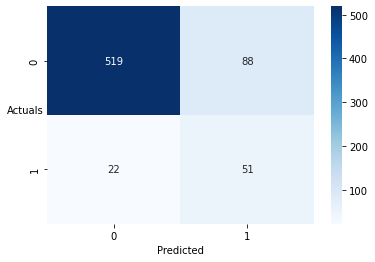

In [68]:
sns.heatmap((metrics.confusion_matrix(Default_test['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [69]:
y_prob_pred = model_1.predict()

In [70]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Default_test['Default'],y_prob_pred_train)

In [71]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.17280424787788892

1.6 Validate the Model on Test Dataset and state the performance matrices. Also state interpretation from the model

In [72]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.4:
        a=1
    else:
        a=0
    y_class_pred.append(a)

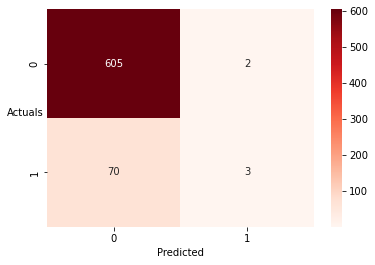

In [73]:
from sklearn import metrics

sns.heatmap((metrics.confusion_matrix(Default_test['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Reds');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [74]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.6:
        a=1
    else:
        a=0
    y_class_pred.append(a)

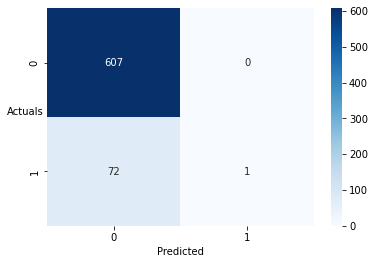

In [75]:
from sklearn import metrics

sns.heatmap((metrics.confusion_matrix(Default_test['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [76]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.8:
        a=1
    else:
        a=0
    y_class_pred.append(a)

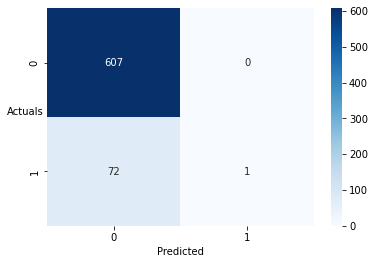

In [77]:
from sklearn import metrics

sns.heatmap((metrics.confusion_matrix(Default_test['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [78]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.3:
        a=1
    else:
        a=0
    y_class_pred.append(a)

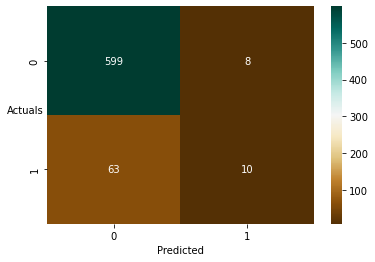

In [79]:
from sklearn import metrics

sns.heatmap((metrics.confusion_matrix(Default_test['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='BrBG');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [80]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

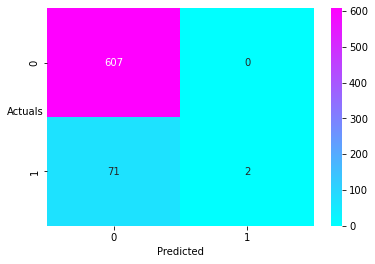

In [81]:
from sklearn import metrics

sns.heatmap((metrics.confusion_matrix(Default_test['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='cool');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

AUC value and RUC curve

Area under Curve (AUC) is: 0.839


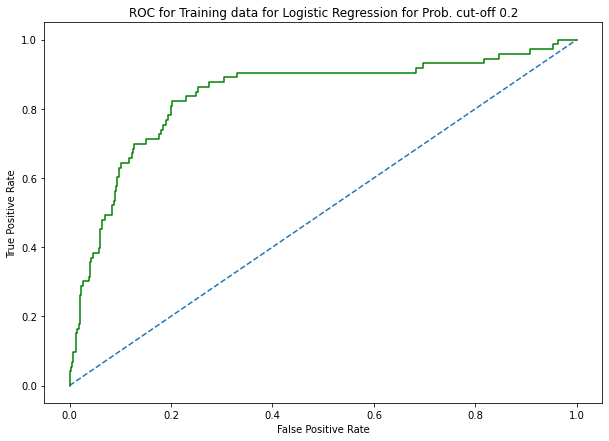

In [82]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
plt.figure(figsize=(10,7))
LOG_train_auc = roc_auc_score(Default_test['Default'], y_prob_pred_train)
print('Area under Curve (AUC) is: %.3f' % LOG_train_auc)
LOG_train_fpr, LOG_train_tpr, LOG_train_thresholds = roc_curve(Default_test['Default'], y_prob_pred_train)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(LOG_train_fpr, LOG_train_tpr,color='green')
plt.title('ROC for Training data for Logistic Regression for Prob. cut-off 0.2')
plt.show()

In [83]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.7:
        a=1
    else:
        a=0
    y_class_pred.append(a)

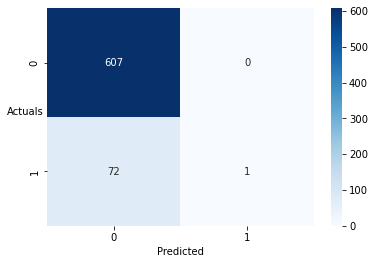

In [84]:
sns.heatmap((metrics.confusion_matrix(Default_test['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [85]:
print(metrics.classification_report(Default_test['Default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.894     1.000     0.944       607
           1      1.000     0.014     0.027        73

    accuracy                          0.894       680
   macro avg      0.947     0.507     0.486       680
weighted avg      0.905     0.894     0.846       680



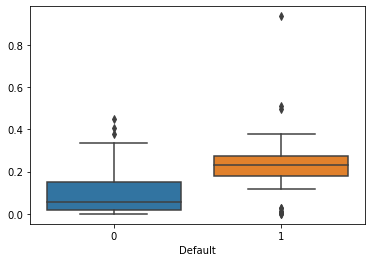

In [86]:
sns.boxplot(x=Default_test['Default'],y=y_prob_pred_train)
plt.xlabel('Default');

In [87]:
y_prob_pred_test = model_1.predict(Default_test)

In [88]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.9:
        a=1
    else:
        a=0
    y_class_pred.append(a)

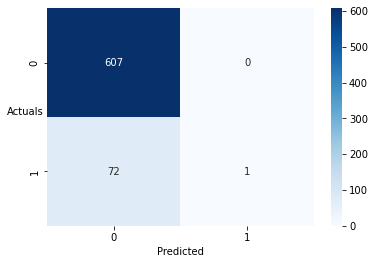

In [89]:
sns.heatmap((metrics.confusion_matrix(Default_test['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [90]:
print(metrics.classification_report(Default_test['Default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.894     1.000     0.944       607
           1      1.000     0.014     0.027        73

    accuracy                          0.894       680
   macro avg      0.947     0.507     0.486       680
weighted avg      0.905     0.894     0.846       680



AUC value and RUC curve

Area under Curve (AUC) is: 0.839


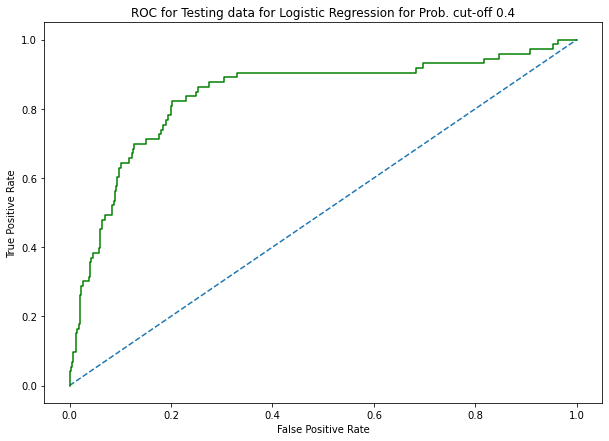

In [91]:
plt.figure(figsize=(10,7))
LOG_test_auc = roc_auc_score(Default_test['Default'], y_prob_pred_test)
print('Area under Curve (AUC) is: %.3f' % LOG_test_auc)
LOG_test_fpr, LOG_test_tpr, LOG_test_thresholds = roc_curve(Default_test['Default'], y_prob_pred_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(LOG_test_fpr, LOG_test_tpr,color='green')
plt.title('ROC for Testing data for Logistic Regression for Prob. cut-off 0.4')
plt.show()